https://huggingface.co/learn/audio-course/en/chapter1/audio_data (ref)

In [ ]:
from datasets import load_dataset

In [ ]:
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

/Applications/anaconda3/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [ ]:
example = minds[0]
example

{'path': '/Users/arun/.cache/huggingface/datasets/downloads/extracted/577b2808eb41b3f684b666a7e8b22cad8355f8d81cc0700cc3d4c06ef9aee902/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/Users/arun/.cache/huggingface/datasets/downloads/extracted/577b2808eb41b3f684b666a7e8b22cad8355f8d81cc0700cc3d4c06ef9aee902/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [ ]:
id2label = minds.features['intent_class'].int2str(example['intent_class'])
id2label

'pay_bill'

In [ ]:
columns_to_remove = ['lang_id', 'english_transcription']
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [ ]:
example = minds[0]
example

{'path': '/Users/arun/.cache/huggingface/datasets/downloads/extracted/577b2808eb41b3f684b666a7e8b22cad8355f8d81cc0700cc3d4c06ef9aee902/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/Users/arun/.cache/huggingface/datasets/downloads/extracted/577b2808eb41b3f684b666a7e8b22cad8355f8d81cc0700cc3d4c06ef9aee902/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

In [ ]:
import gradio as gr

In [ ]:
id2label = minds.features['intent_class'].int2str

def generate_audio():
    example = minds.shuffle()[0]
    audio = example['audio']
    return  (audio['sampling_rate'], audio['array']), id2label(example['intent_class'])

generate_audio()

((8000,
  array([-0.00024414,  0.        ,  0.        , ..., -0.00024414,
         -0.00048828, -0.00024414])),
 'freeze')

In [ ]:
with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)
demo.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [ ]:
import librosa
import matplotlib.pyplot as plt

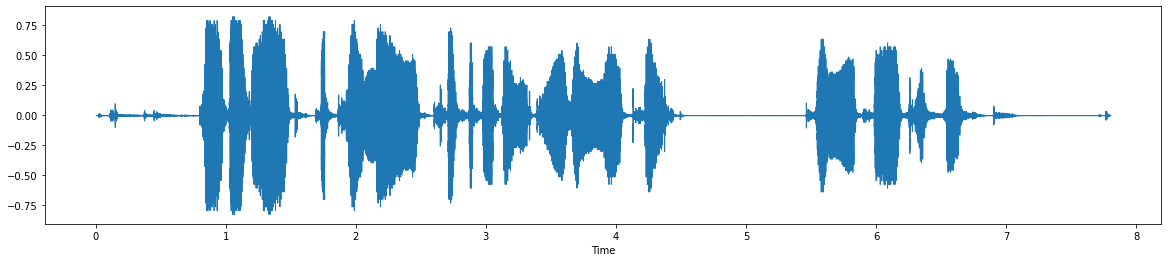

In [ ]:
arrray, sr = example['audio']['array'], example['audio']['sampling_rate']
plt.figure().set_figwidth(20)
librosa.display.waveshow(arrray, sr=sr);